In [4]:
def task1(array):
    return array.index('0')
def task(array):
    for i in range(len(array)):
        if array[i]=='0':
            return i
print(task1("111111111110000000000000000"))
print(task("111111111110000000000000000"))
print(task('111111111111111111111111100000000'))

11
11
25


True

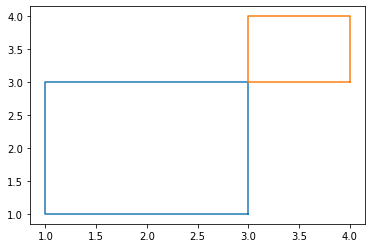

In [2]:
from pylab import *
def show(*koord):
    """для наглядности"""
    key_x = (2,0,0,2,2)
    key_y = (1,1,3,3,1)
    koord1 = koord[:4]
    koord2 = koord[4:]
    x1,y1 = x_y(koord1)
    x2,y2 = x_y(koord2)
    plot(x1,y1)
    plot(x2,y2)
def x_y(koord):
    key_x = (2,0,0,2,2)
    key_y = (1,1,3,3,1)
    return [koord[i] for i in key_x],[koord[i] for i in key_y]
def task(x1,y1,x2,y2,x3,y3,x4,y4):
    """в условии было не совсем понятно, если площадь пересечения равна 0, то они пересекаются или нет.
    В данной задаче считается, что они пересекаются, но это можно легко изменить"""
    show(x1,y1,x2,y2,x3,y3,x4,y4)
    if min(x1,x2)>max(x3,x4):
        return False
    if min(x3,x4)>max(x1,x2):
        return False
    if max(y1,y2)<min(y3,y4):
        return False
    if max(y3,y4)<min(y1,y2):
        return False
    return True
task(1,1,2,2,3,3,4,4)

In [2]:
import requests
from bs4 import BeautifulSoup
def animals():
    """Не совсем понял, нужны ли названия животных, которые на английском или нет, но решил оставить,
    это можно легко исправить, ускорив программу"""
    res = requests.get('https://ru.wikipedia.org/w/index.php?title=%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%96%D0%B8%D0%B2%D0%BE%D1%82%D0%BD%D1%8B%D0%B5_%D0%BF%D0%BE_%D0%B0%D0%BB%D1%84%D0%B0%D0%B2%D0%B8%D1%82%D1%83')
    soup = BeautifulSoup(res.text, "html.parser")
    Dict_animals = dict()
    Dict_animals['А'] = 0
    for word in soup.body.find('div', attrs={'id':'mw-pages'}).find_all('li'):
        Dict_animals[word.text[0]] += 1
    url = soup.body.find('div', attrs={'id':'mw-pages'}).find('a')['href']
    res = requests.get('https://ru.wikipedia.org' +url)
    soup = BeautifulSoup(res.text, "html.parser")
    try:
        while True:
            for i,word in enumerate(soup.body.find('div', attrs={'id':'mw-pages'}).find_all('li')):
                if word.text[0] in Dict_animals:
                    Dict_animals[word.text[0]] += 1
                else:
                    Dict_animals[word.text[0]] = 1
            url = soup.body.find('div', attrs={'id':'mw-pages'}).find_all('a')[i+4]
            res = requests.get('https://ru.wikipedia.org' +url['href'])
            soup = BeautifulSoup(res.text, "html.parser")
    except:
        pass
    for i in Dict_animals:
        print(F'{i}: {Dict_animals[i]}')
animals()

А: 1146
Б: 1600
В: 515
Ж: 392
Г: 984
П: 1730
Д: 739
H: 945
Е: 99
Ё: 2
О: 764
Я: 209
З: 619
И: 337
Й: 3
К: 2184
С: 1736
Л: 679
М: 1242
Н: 451
Р: 555
Т: 968
У: 241
Ф: 188
Х: 270
Ц: 218
Ч: 658
Ш: 267
Щ: 146
Э: 213
Ю: 133
A: 2841
B: 948
C: 2255
D: 960
E: 942
F: 195
G: 640
I: 324
J: 80
K: 224
L: 942
M: 1623
N: 761
O: 768
P: 2472
Q: 37
R: 480
S: 1691
T: 1196
U: 135
V: 169
W: 86
X: 160
Y: 44
Z: 208


In [ ]:
def appearance(intervals):
"""Ответы в данной задаче будут немного расходиться с ответами, которые представлены в решении,
так как в ней считается, что если урок закончился, учитель или ученик вышли из занятия в 30000015,
а потом зашли в 30000016, то занятие не закончилось, а продолжилось, так как не понятно, в начале
секунды или в конце секунды это произошло, а моя программа считает именно количество секунд(пример
из-за чего добавляется пару секунд описал в сообщении, которое отправил вам на почту)"""
    def simplify(interval):
        spis = []
        for i in range(len(interval)//2):
            for j in range(interval[2*i],interval[2*i+1]+1):
                spis.append(j)
        return spis
    interval_lesson = list(set(simplify(intervals['data']['lesson'])))
    interval_pupil = list(set(simplify(intervals['data']['pupil'])))
    interval_tutor = list(set(simplify(intervals['data']['tutor'])))
    interval = []
    answer = 0
    for i in interval_lesson:
        if i in interval_pupil:
            interval.append(i)
    for i in interval:
        if i in interval_tutor:
            answer+=1
    return answer